In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# TASK

From a given 'Iris' dataset to predict the optimum number of clusters and represent it visually

https://bit.ly/3kXTdox

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
train_file_path = '/content/drive/MyDrive/GRIP/Iris.csv'
df = pd.read_csv(train_file_path)

In [9]:
df.drop('Id', inplace=True, axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

target labels are 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

will see haw many we can find

In [35]:
target = df['Species']
df_train = df.drop('Species', axis=1)

In [36]:
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
df_train['Petal_size'] = df_train['PetalWidthCm'] * df_train['PetalLengthCm']
df_train['Sepal_size'] = df_train['SepalLengthCm'] * df_train['SepalWidthCm']

In [38]:
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Petal_size,Sepal_size
0,5.1,3.5,1.4,0.2,0.28,17.85
1,4.9,3.0,1.4,0.2,0.28,14.70
2,4.7,3.2,1.3,0.2,0.26,15.04
3,4.6,3.1,1.5,0.2,0.30,14.26
4,5.0,3.6,1.4,0.2,0.28,18.00
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,11.96,20.10
146,6.3,2.5,5.0,1.9,9.50,15.75
147,6.5,3.0,5.2,2.0,10.40,19.50
148,6.2,3.4,5.4,2.3,12.42,21.08


In [85]:
fea1 = 'Petal_size'
fea2 = 'Sepal_size'

X = df_train[[fea1, fea2]]
X

,Petal_size,Sepal_size
0,0.28,17.85
1,0.28,14.70
2,0.26,15.04
3,0.30,14.26
4,0.28,18.00
...,...,...
145,11.96,20.10
146,9.50,15.75
147,10.40,19.50
148,12.42,21.08


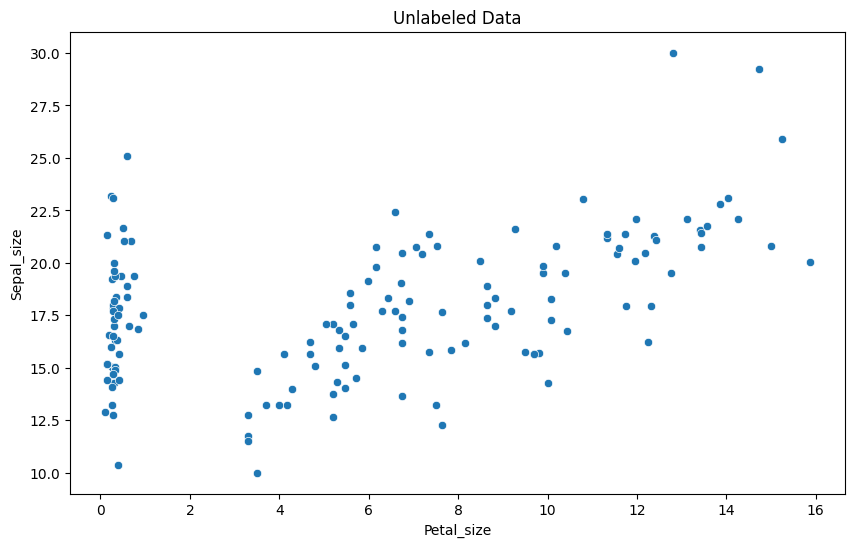

In [88]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Petal_size'], y=X['Sepal_size'])
plt.title('Unlabeled Data')
plt.xlabel('Petal_size')
plt.ylabel('Sepal_size')
plt.show()

In [89]:
# take as first choice, 3 clusters
k = 3

kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(X)

# Predicting the clusters
labels = kmeans.predict(X)

In [90]:
# Getting the cluster centers
centers = kmeans.cluster_centers_
centers

array([[ 6.4516129 , 16.12870968],
       [ 0.3628    , 17.2088    ],
       [11.86394737, 21.33052632]])

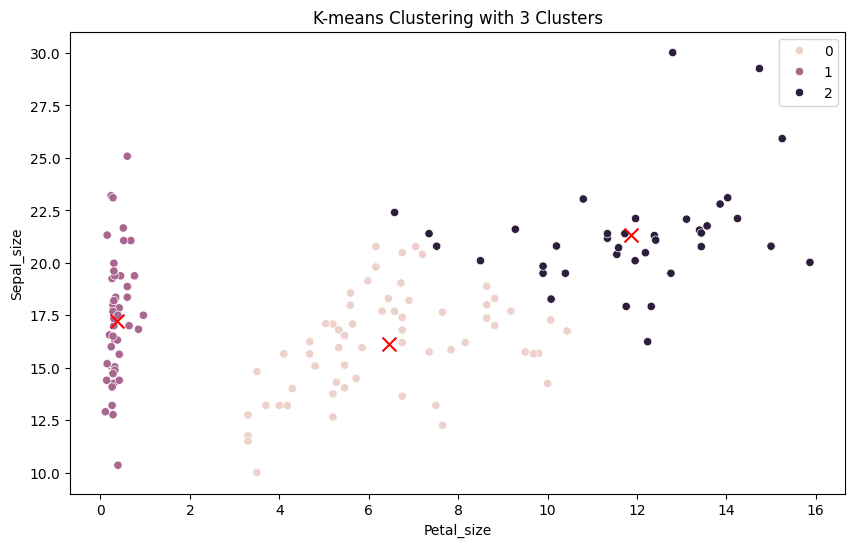

In [91]:
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[fea1], y=X[fea2], hue=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='x')  # Marking the cluster centers
plt.title('K-means Clustering with 3 Clusters')
plt.xlabel(fea1)
plt.ylabel(fea2)
plt.show()

In [92]:
# List to store the sum of squared distances for each k
ssd = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

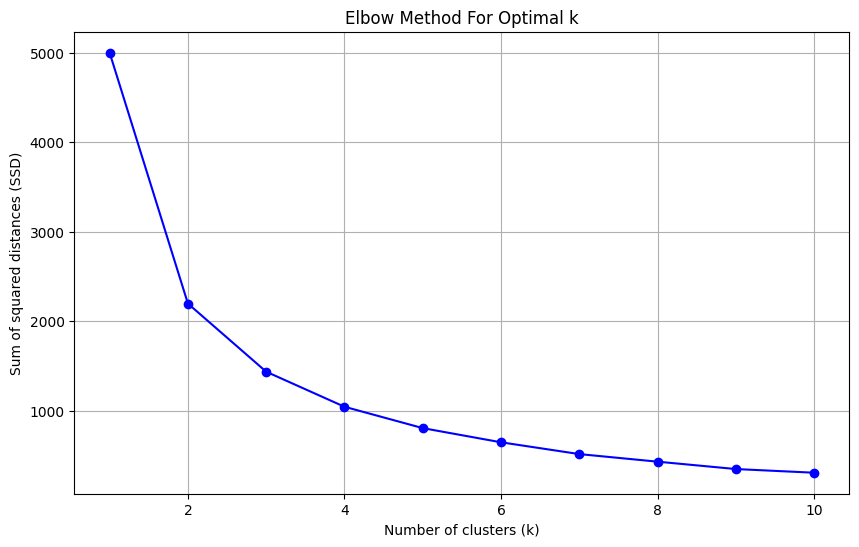

In [93]:
# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1,11), ssd, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSD)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

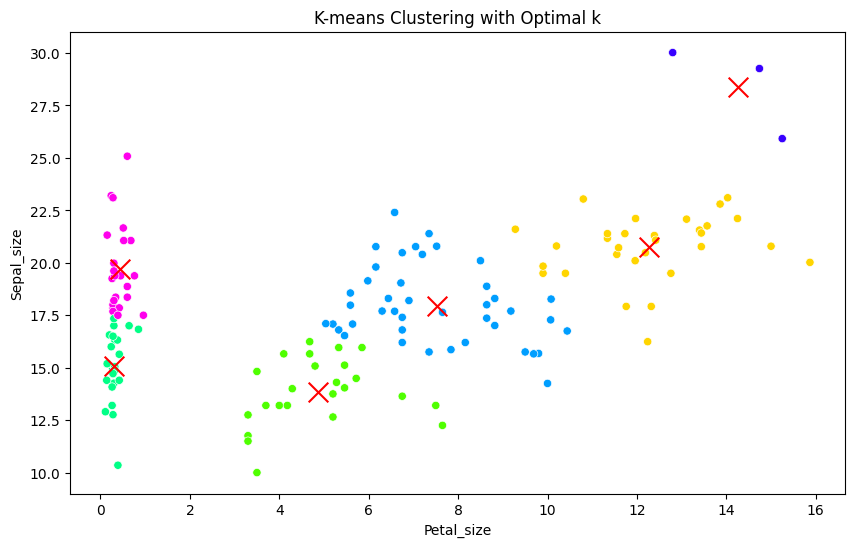

In [94]:
optimal_k = 6

kmeans_optimal = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans_optimal.fit(X)

# Predicting the clusters
labels = kmeans_optimal.predict(X)

# Assign clusters to the data points
labels = kmeans_optimal.labels_

# Get the coordinates of the cluster centers
centers = kmeans_optimal.cluster_centers_

# Plotting the final clusters along with their centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[fea1], y=X[fea2], hue=labels, palette=sns.color_palette("hsv", optimal_k), legend=None)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='x')  # Cluster centers
plt.title('K-means Clustering with Optimal k')
plt.xlabel('Petal_size')
plt.ylabel('Sepal_size')
plt.show()

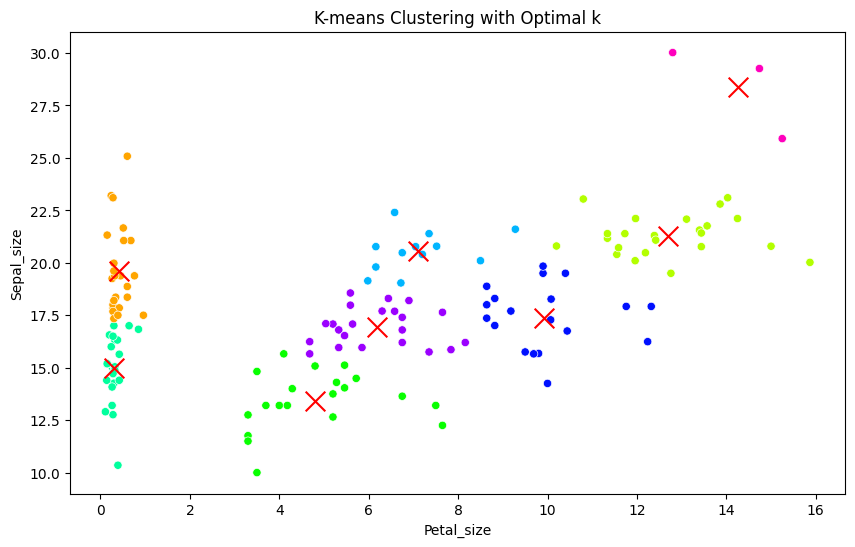

In [95]:
optimal_k = 8

kmeans_optimal = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans_optimal.fit(X)

# Predicting the clusters
labels = kmeans_optimal.predict(X)

# Assign clusters to the data points
labels = kmeans_optimal.labels_

# Get the coordinates of the cluster centers
centers = kmeans_optimal.cluster_centers_

# Plotting the final clusters along with their centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[fea1], y=X[fea2], hue=labels, palette=sns.color_palette("hsv", optimal_k), legend=None)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='x')  # Cluster centers
plt.title('K-means Clustering with Optimal k')
plt.xlabel('Petal_size')
plt.ylabel('Sepal_size')
plt.show()

# My oppinion is that the optimal number of clusters for our Iris case is 6

- to keep it at a meaningful size and data distribution by Petal size and Sepal size, but the final decision depends on the business requirements in identifing clusters